# D Sasindra(RA2011053040005)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df=pd.read_csv("zfdata.csv")

### understanding our dataset

In [3]:
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [5]:
df.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [6]:
df.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

### Data Pre-Processing

### checking for missing values

In [7]:
df.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

### Finding the precentage of Missing values

In [8]:
num_missing = df.isna().sum()
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / df.shape[0]
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
END_DATE (YYYYMMDD),7219,69.668018
MEMBER_MARITAL_STATUS,2597,25.062729
MEMBER_ANNUAL_INCOME,1754,16.927234
MEMBER_GENDER,611,5.896545
MEMBER_OCCUPATION_CD,43,0.414978


### Dropping Unnecesary Columns and Null values

In [9]:
df=df.drop("END_DATE  (YYYYMMDD)",axis=1)
df=df.drop("MEMBERSHIP_NUMBER",axis=1)
df=df.drop("AGENT_CODE",axis=1)

In [10]:
df=df.dropna(axis=0)

### Checking for null values 

In [11]:
df.isnull().sum()

MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
dtype: int64

### Finding categorical values

In [12]:
print(df['MEMBER_MARITAL_STATUS'].value_counts())
print(df['MEMBER_GENDER'].value_counts())
print(df['MEMBERSHIP_PACKAGE'].value_counts())
print(df['MEMBERSHIP_STATUS'].value_counts())
print(df['PAYMENT_MODE'].value_counts())

MEMBER_MARITAL_STATUS
M    5996
S    1117
W     117
D      45
Name: count, dtype: int64
MEMBER_GENDER
M    5562
F    1713
Name: count, dtype: int64
MEMBERSHIP_PACKAGE
TYPE-B    5362
TYPE-A    1913
Name: count, dtype: int64
MEMBERSHIP_STATUS
INFORCE      4937
CANCELLED    2338
Name: count, dtype: int64
PAYMENT_MODE
ANNUAL            4441
MONTHLY           1434
SEMI-ANNUAL       1079
QUARTERLY          313
SINGLE-PREMIUM       8
Name: count, dtype: int64


### Replacing categorical values with numerical values

In [13]:
df['MEMBER_MARITAL_STATUS'].replace(['S', 'M', 'D', 'W'], [0, 1, 2, 3], inplace=True)
df['MEMBER_GENDER'].replace(['F', 'M'], [0, 1], inplace=True)
df['MEMBERSHIP_PACKAGE'].replace(['TYPE-A', 'TYPE-B'], [0, 1], inplace=True)
df['PAYMENT_MODE'].replace(['SINGLE-PREMIUM', 'ANNUAL', 'SEMI-ANNUAL', 'QUARTERLY', 'MONTHLY'], [0, 1, 2, 3, 4], inplace=True)
df['MEMBERSHIP_STATUS'].replace(['CANCELLED', 'INFORCE'], [0, 1], inplace=True)
print(df)

       MEMBERSHIP_TERM_YEARS  ANNUAL_FEES  MEMBER_MARITAL_STATUS  \
0                         29    113125.00                      1   
1                         38    112220.00                      1   
2                         12    100000.00                      1   
3                         12    100000.00                      1   
4                         46    100000.00                      1   
...                      ...          ...                    ...   
10352                     32    297270.24                      1   
10353                     19    123706.92                      0   
10354                     17    141011.64                      1   
10356                     17    113316.53                      1   
10361                     17    100000.36                      3   

       MEMBER_GENDER  MEMBER_ANNUAL_INCOME  MEMBER_OCCUPATION_CD  \
0                  1            25200000.0                   1.0   
1                  1            10339200.0     

### Checking data type after changing the categorical to numerical

In [14]:
df.dtypes

MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS      int64
MEMBER_GENDER              int64
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE         int64
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE               int64
MEMBERSHIP_STATUS          int64
START_DATE (YYYYMMDD)      int64
dtype: object

### checking data information after pre-processing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7275 entries, 0 to 10361
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_TERM_YEARS  7275 non-null   int64  
 1   ANNUAL_FEES            7275 non-null   float64
 2   MEMBER_MARITAL_STATUS  7275 non-null   int64  
 3   MEMBER_GENDER          7275 non-null   int64  
 4   MEMBER_ANNUAL_INCOME   7275 non-null   float64
 5   MEMBER_OCCUPATION_CD   7275 non-null   float64
 6   MEMBERSHIP_PACKAGE     7275 non-null   int64  
 7   MEMBER_AGE_AT_ISSUE    7275 non-null   int64  
 8   ADDITIONAL_MEMBERS     7275 non-null   int64  
 9   PAYMENT_MODE           7275 non-null   int64  
 10  MEMBERSHIP_STATUS      7275 non-null   int64  
 11  START_DATE (YYYYMMDD)  7275 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 738.9 KB


### Exploratory Data Analysis(EDA)

### Correlation Matrix

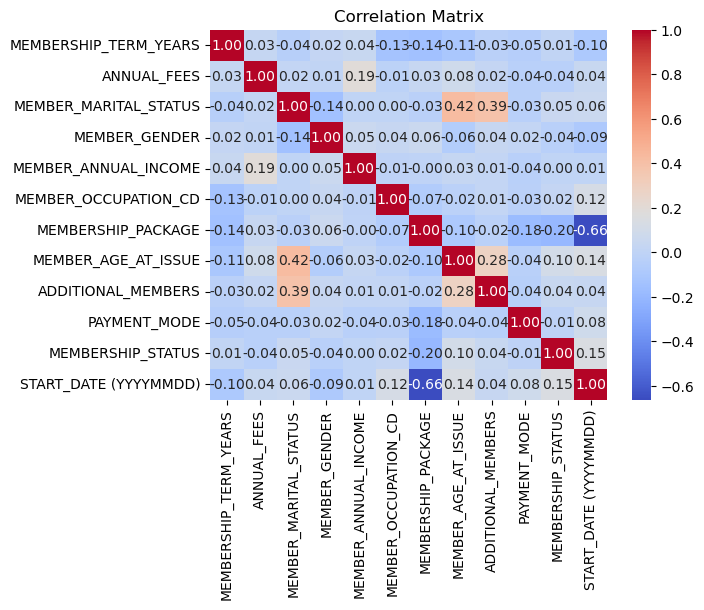

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Checking Data balance

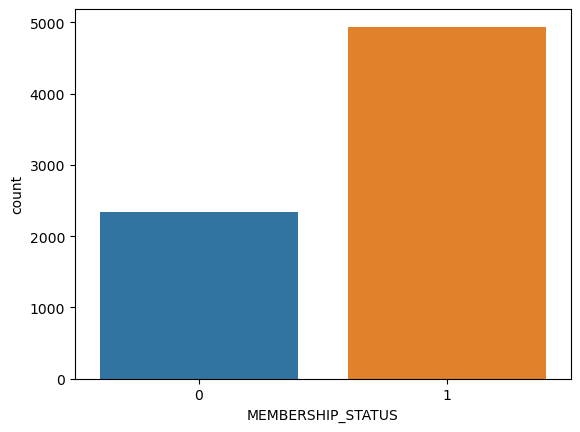

MEMBERSHIP_STATUS
1    4937
0    2338
Name: count, dtype: int64
Imbalance Ratio: 0.47356694348794814


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='MEMBERSHIP_STATUS', data=df)
plt.show()
class_counts = df['MEMBERSHIP_STATUS'].value_counts()
print(class_counts)
imbalance_ratio = class_counts[0] / class_counts[1]
print("Imbalance Ratio:", imbalance_ratio)

### Finding the Range of Numerical values

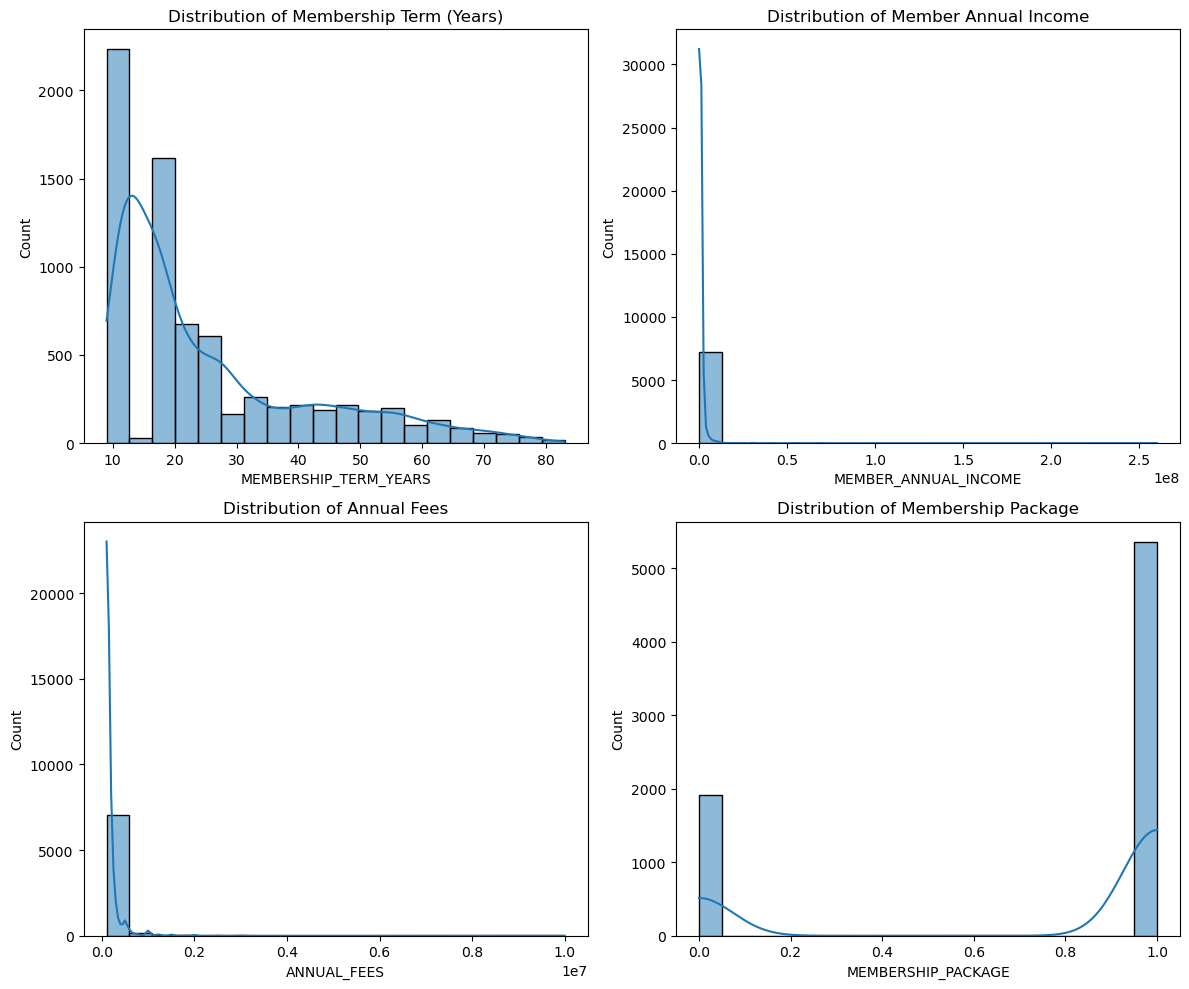

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution of 'MEMBERSHIP_TERM_YEARS'
sns.histplot(df['MEMBERSHIP_TERM_YEARS'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Membership Term (Years)')

# Plot the distribution of 'MEMBER_ANNUAL_INCOME'
sns.histplot(df['MEMBER_ANNUAL_INCOME'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Member Annual Income')

# Plot the distribution of 'ANNUAL_FEES'
sns.histplot(df['ANNUAL_FEES'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Annual Fees')

# Plot the distribution of 'MEMBERSHIP_PACKAGE'
sns.histplot(df['MEMBERSHIP_PACKAGE'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Membership Package')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### Pair plotting the features

C:\Users\Sasindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


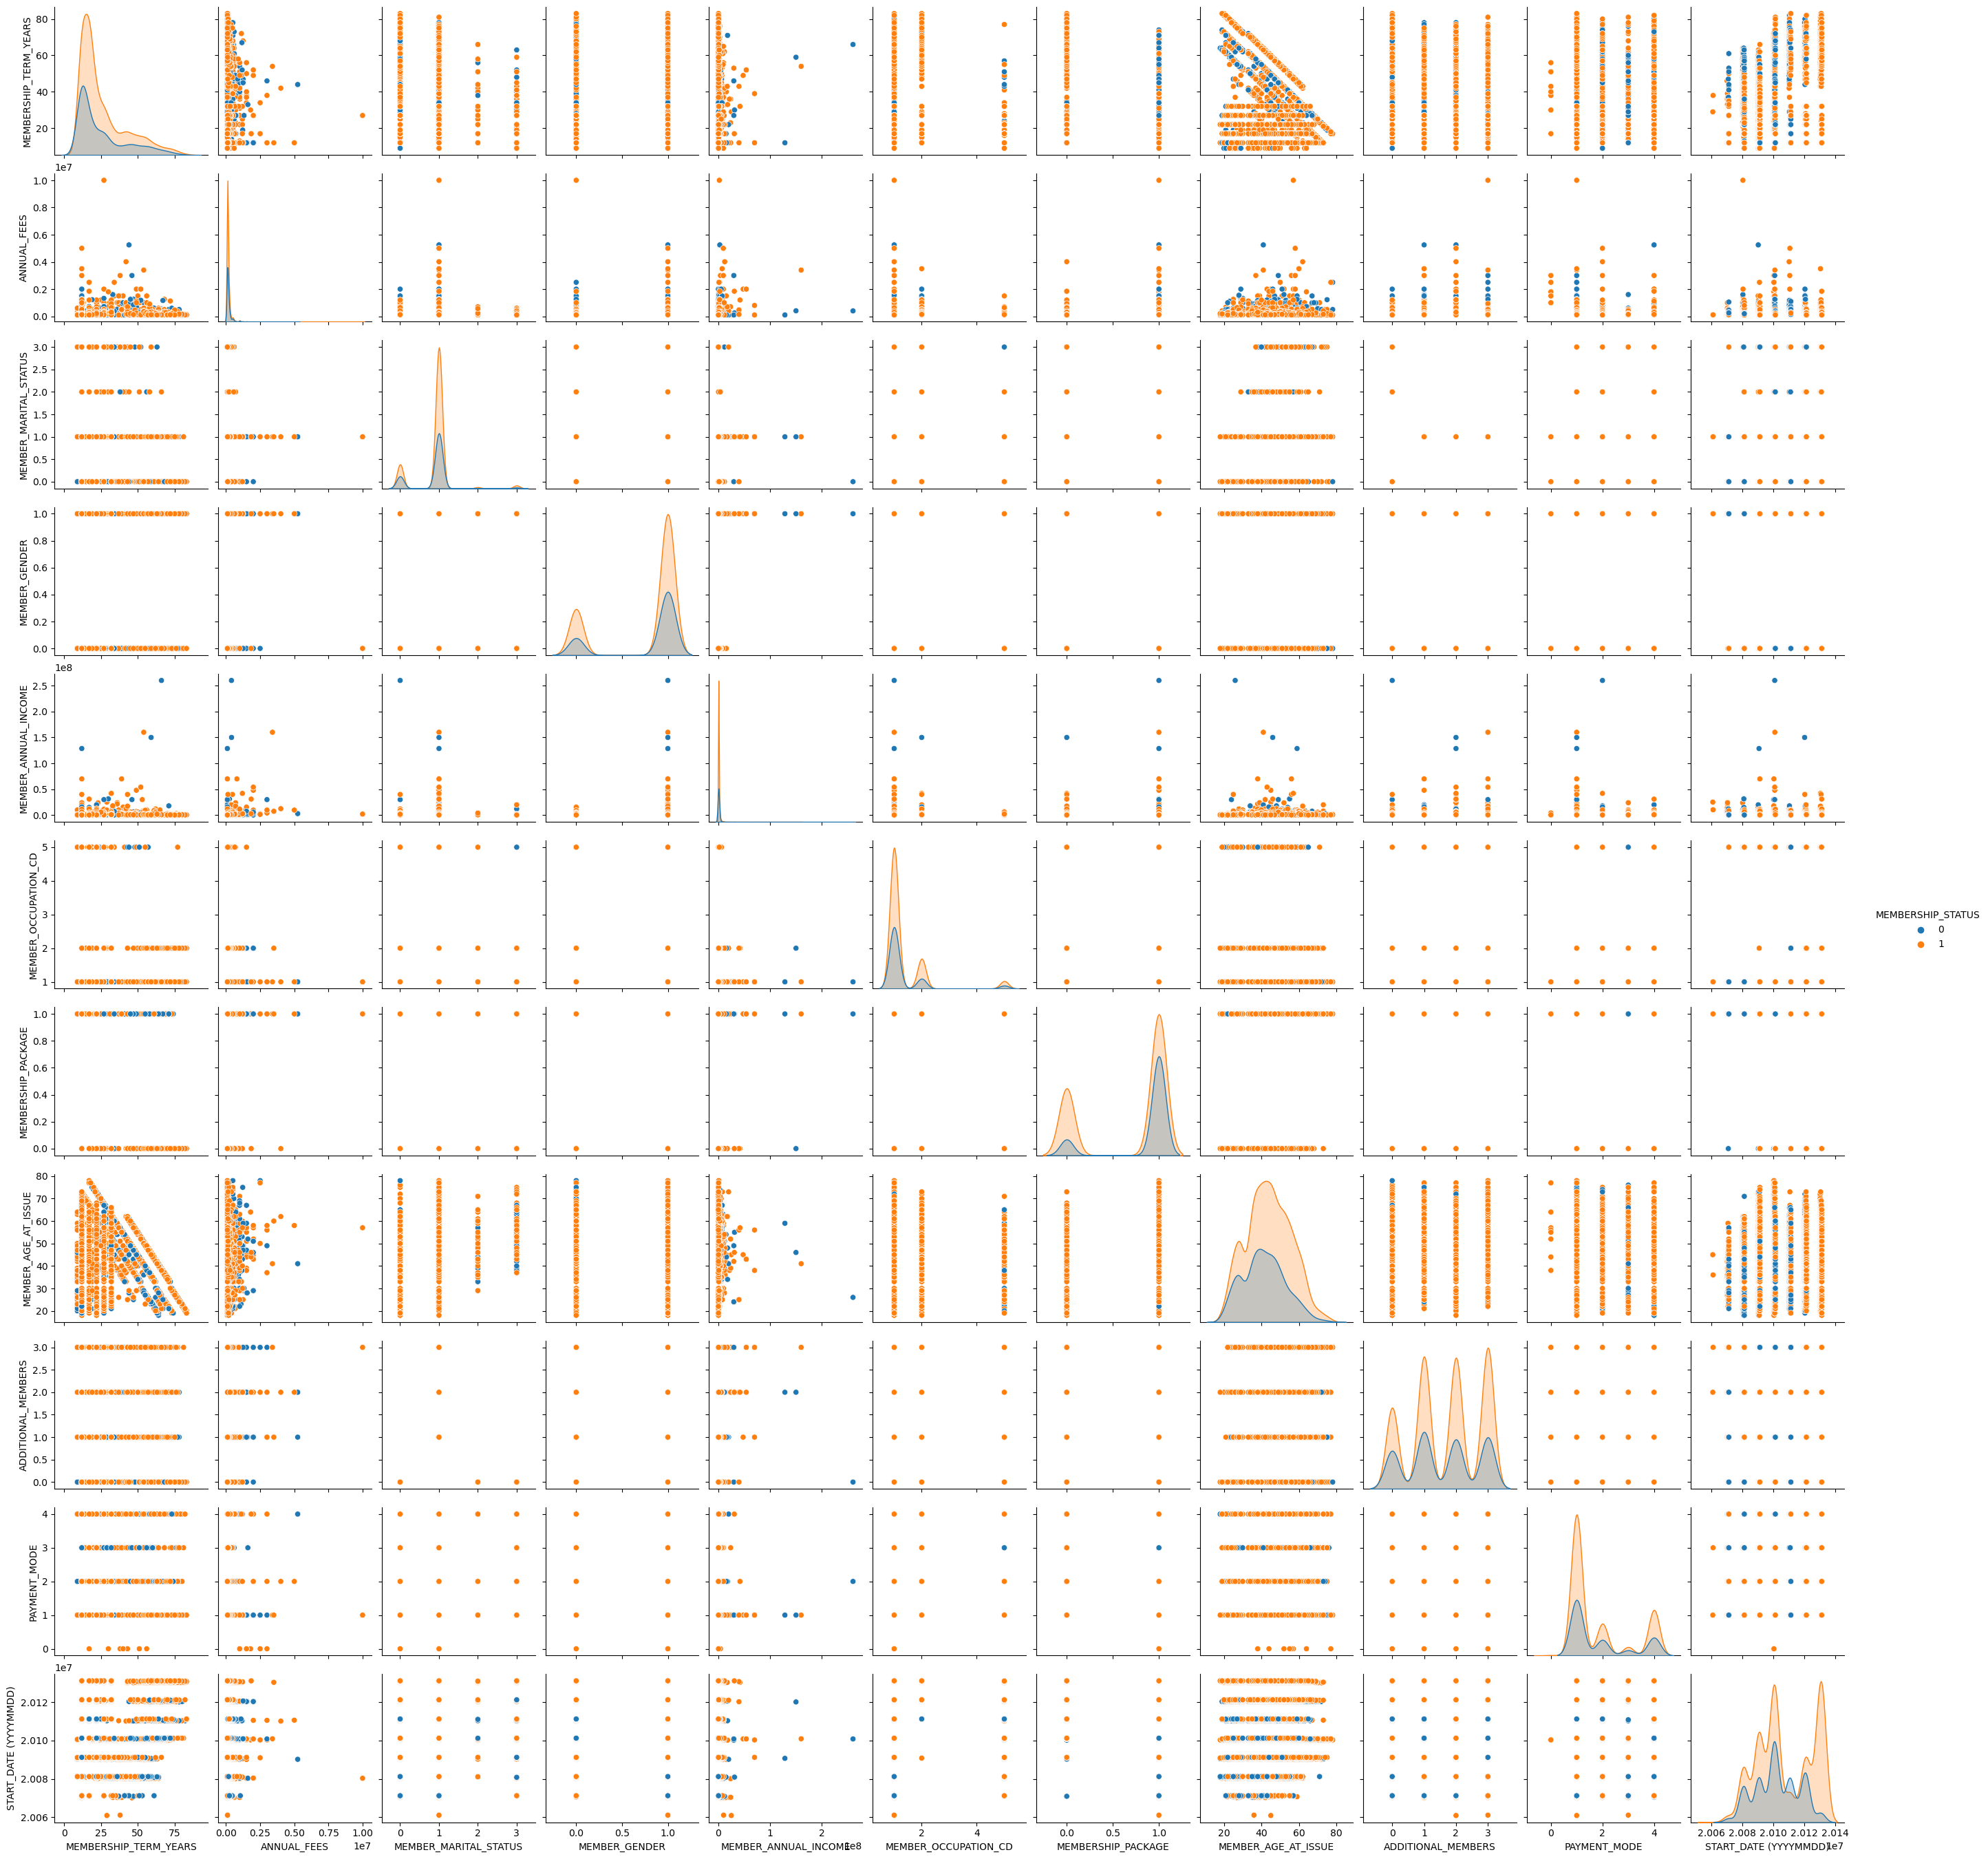

In [19]:
# Pair plot
sns.pairplot(df, hue='MEMBERSHIP_STATUS', diag_kind='kde')
plt.show()


### Checking Membership status frequency for each feature

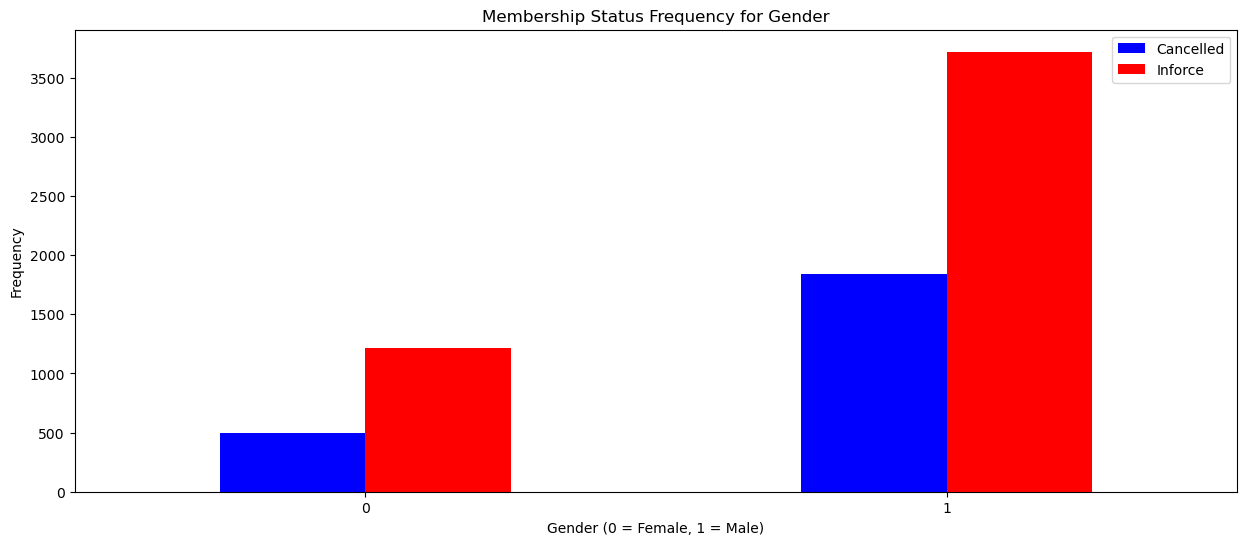

In [20]:
pd.crosstab(df.MEMBER_GENDER,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Membership Status Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

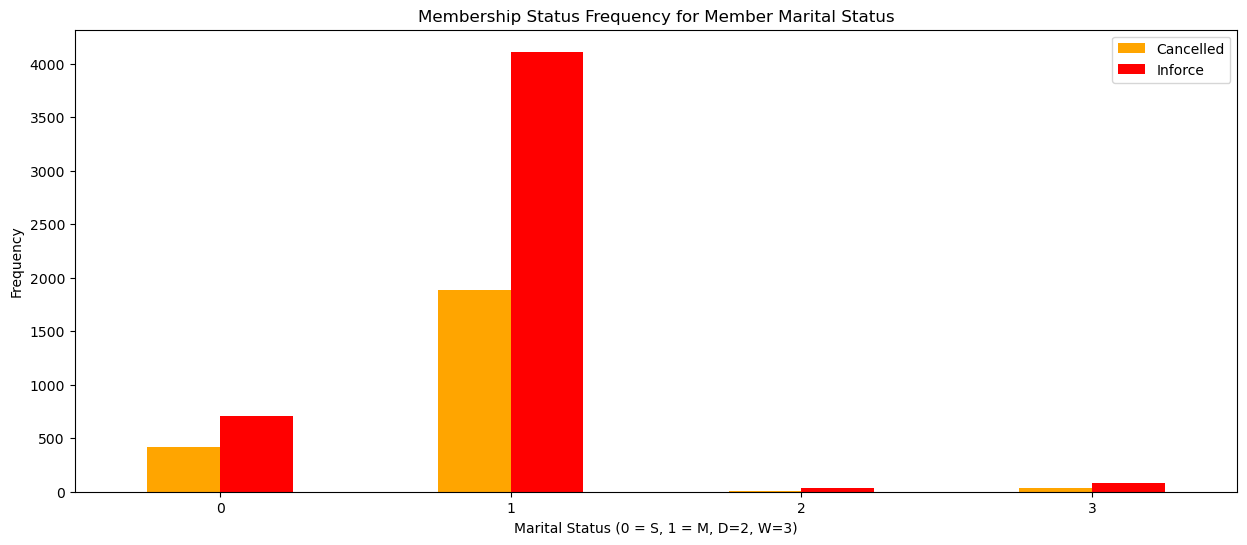

In [21]:
pd.crosstab(df.MEMBER_MARITAL_STATUS,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['orange','red' ])
plt.title('Membership Status Frequency for Member Marital Status')
plt.xlabel('Marital Status (0 = S, 1 = M, D=2, W=3)')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

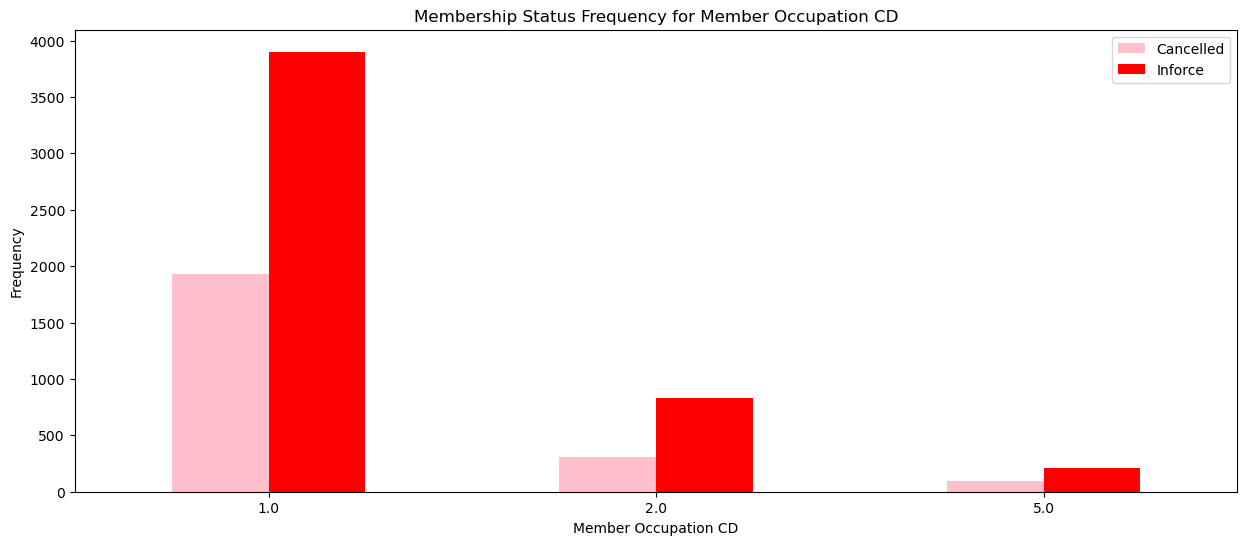

In [22]:
pd.crosstab(df.MEMBER_OCCUPATION_CD,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['pink','red' ])
plt.title('Membership Status Frequency for Member Occupation CD')
plt.xlabel('Member Occupation CD')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

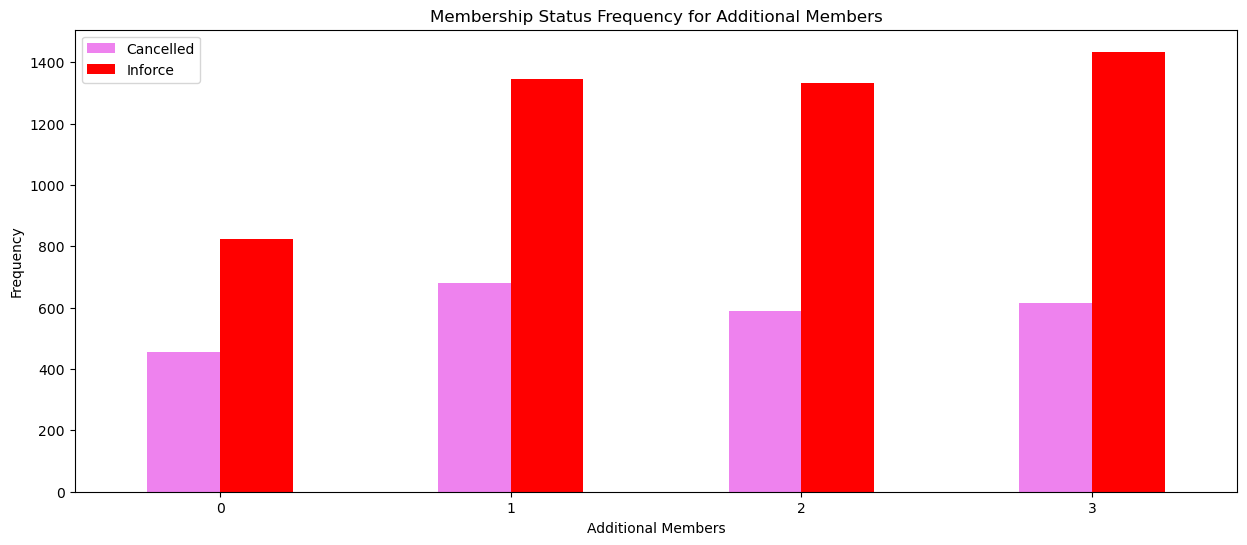

In [23]:
pd.crosstab(df.ADDITIONAL_MEMBERS,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['violet','red' ])
plt.title('Membership Status Frequency for Additional Members')
plt.xlabel('Additional Members')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

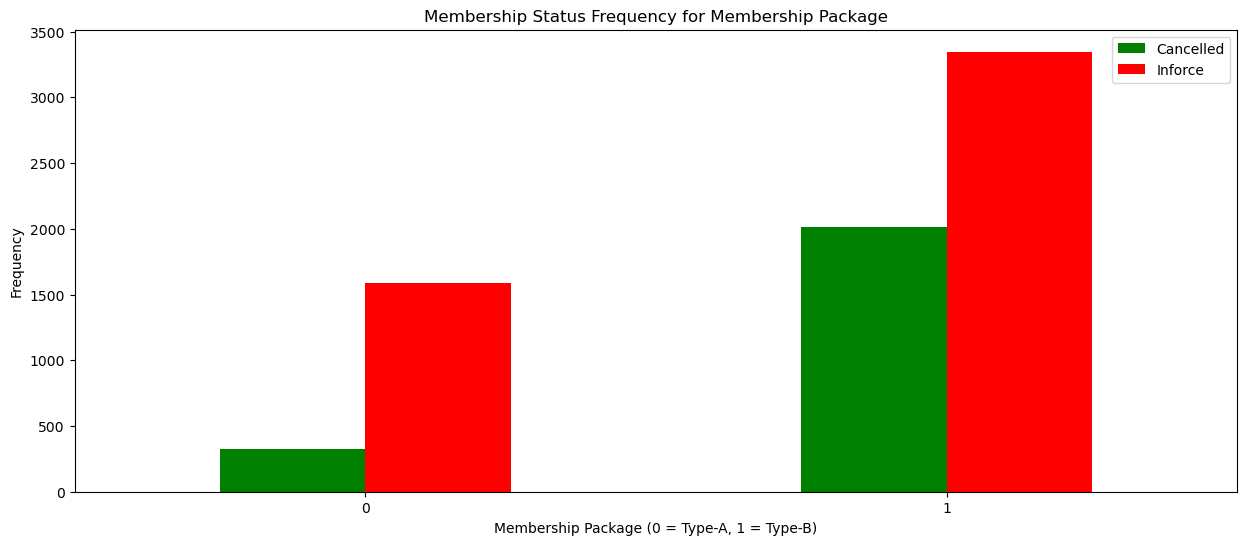

In [24]:
pd.crosstab(df.MEMBERSHIP_PACKAGE,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Membership Status Frequency for Membership Package')
plt.xlabel('Membership Package (0 = Type-A, 1 = Type-B)')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

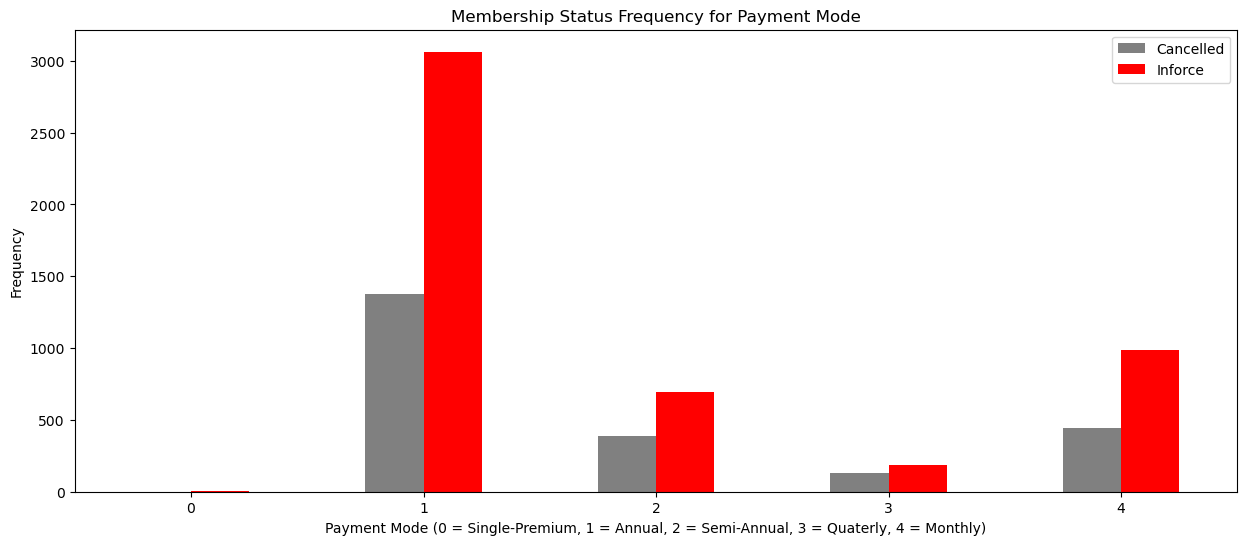

In [25]:
pd.crosstab(df.PAYMENT_MODE,df.MEMBERSHIP_STATUS).plot(kind="bar",figsize=(15,6),color=['grey','red' ])
plt.title('Membership Status Frequency for Payment Mode')
plt.xlabel('Payment Mode (0 = Single-Premium, 1 = Annual, 2 = Semi-Annual, 3 = Quaterly, 4 = Monthly)')
plt.xticks(rotation=0)
plt.legend(["Cancelled", "Inforce"])
plt.ylabel('Frequency')
plt.show()

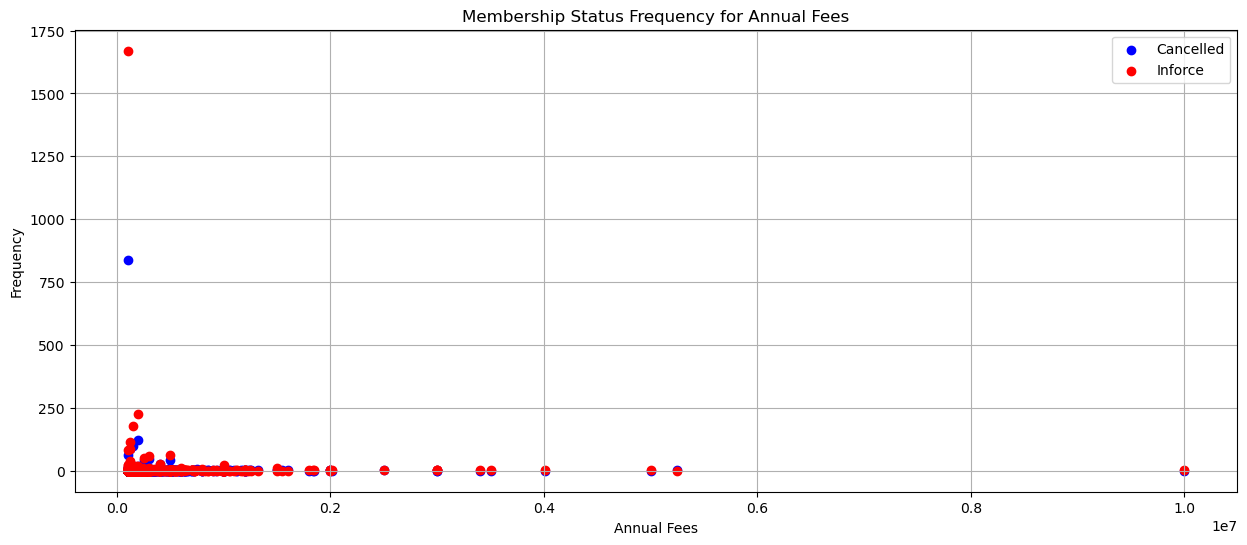

In [26]:
df['MEMBERSHIP_STATUS'] = df['MEMBERSHIP_STATUS'].astype('category')

# Create a crosstab for 'ANNUAL_FEES' and 'MEMBERSHIP_STATUS'
crosstab_data = pd.crosstab(df['ANNUAL_FEES'], df['MEMBERSHIP_STATUS'])

# Plot using line graph
plt.figure(figsize=(15, 6))
plt.scatter(crosstab_data.index, crosstab_data[0], label='Cancelled', marker='o', color='blue')
plt.scatter(crosstab_data.index, crosstab_data[1], label='Inforce', marker='o', color='red')

plt.title('Membership Status Frequency for Annual Fees')
plt.xlabel('Annual Fees')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

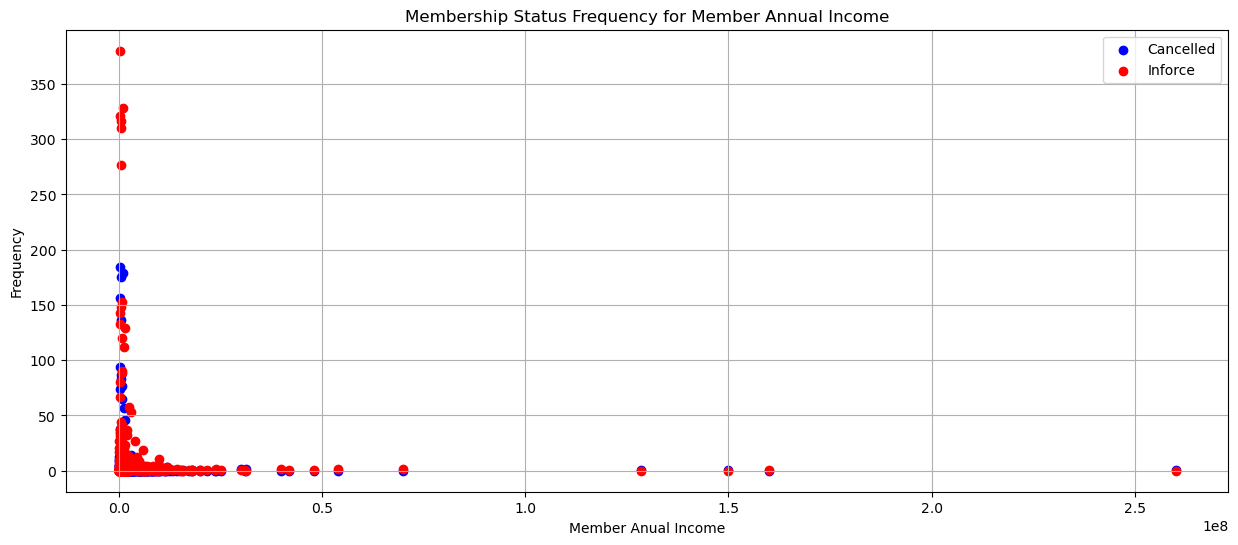

In [27]:
df['MEMBERSHIP_STATUS'] = df['MEMBERSHIP_STATUS'].astype('category')

# Create a crosstab for 'ANNUAL_FEES' and 'MEMBERSHIP_STATUS'
crosstab_data = pd.crosstab(df['MEMBER_ANNUAL_INCOME'], df['MEMBERSHIP_STATUS'])

# Plot using line graph
plt.figure(figsize=(15, 6))
plt.scatter(crosstab_data.index, crosstab_data[0], label='Cancelled', marker='o', color='blue')
plt.scatter(crosstab_data.index, crosstab_data[1], label='Inforce', marker='o', color='red')

plt.title('Membership Status Frequency for Member Annual Income')
plt.xlabel('Member Anual Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

y = df['MEMBERSHIP_STATUS'] 
X = df.drop("MEMBERSHIP_STATUS",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model fitting

### Random Forest

Accuracy: 0.7072164948453609
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.43      0.49       483
           1       0.75      0.85      0.79       972

    accuracy                           0.71      1455
   macro avg       0.66      0.64      0.64      1455
weighted avg       0.69      0.71      0.69      1455



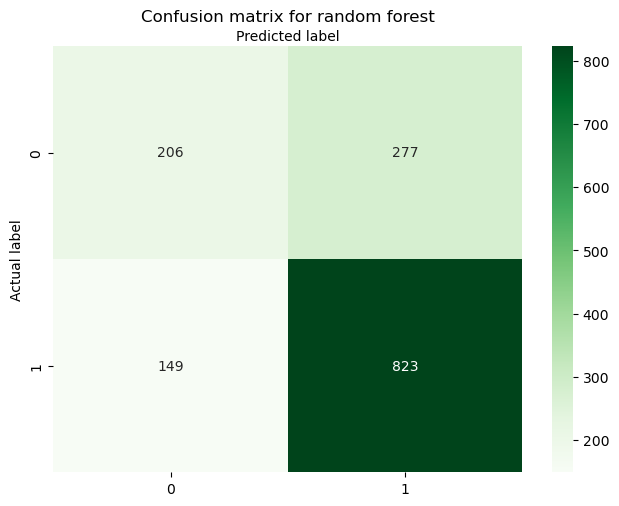

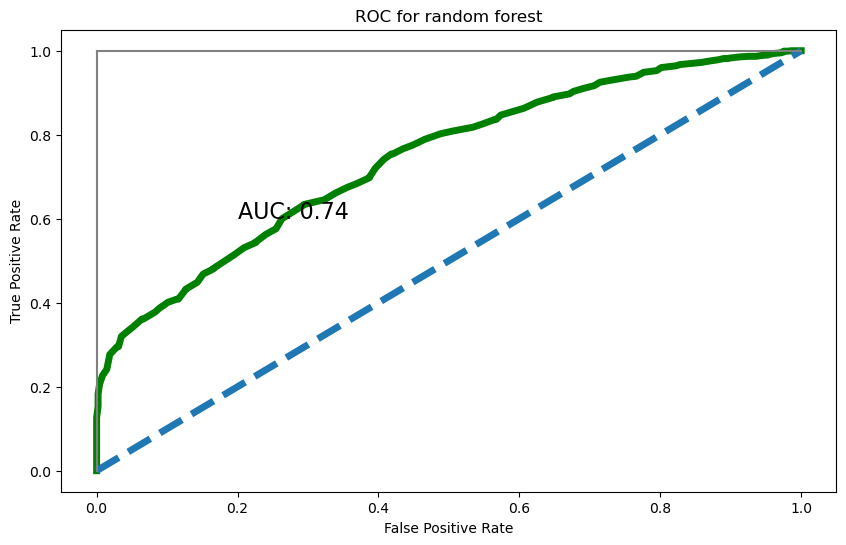

In [29]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = rf_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_rf = round(accuracy_score(y_pred,y_test)*100,2) 

### Decision Tree

Accuracy: 0.6556701030927835
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       483
           1       0.73      0.76      0.75       972

    accuracy                           0.66      1455
   macro avg       0.61      0.60      0.60      1455
weighted avg       0.65      0.66      0.65      1455



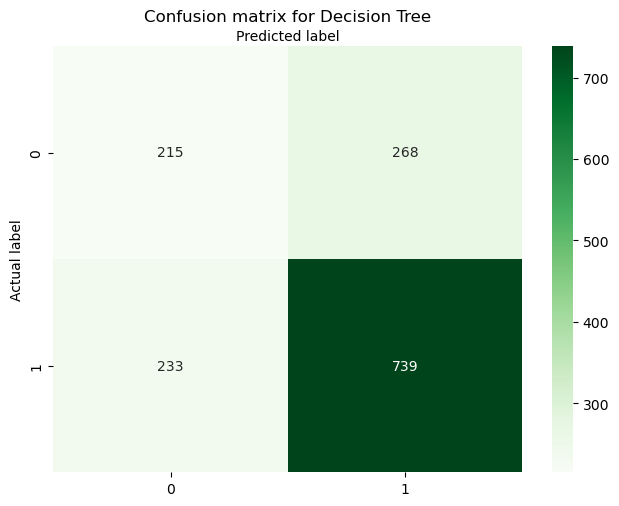

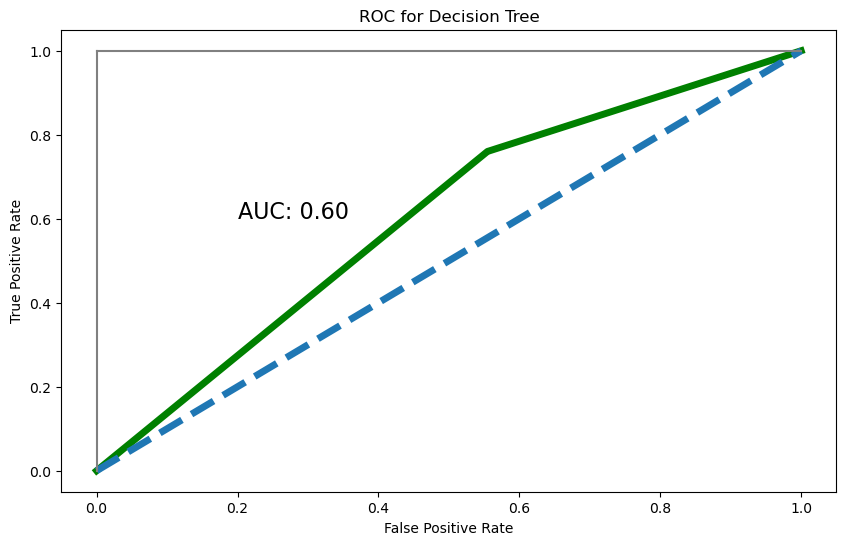

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = dt_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_dt = round(accuracy_score(y_pred,y_test)*100,2)

### KNN

Accuracy: 0.638487972508591
              precision    recall  f1-score   support

           0       0.45      0.37      0.40       483
           1       0.71      0.77      0.74       972

    accuracy                           0.64      1455
   macro avg       0.58      0.57      0.57      1455
weighted avg       0.62      0.64      0.63      1455



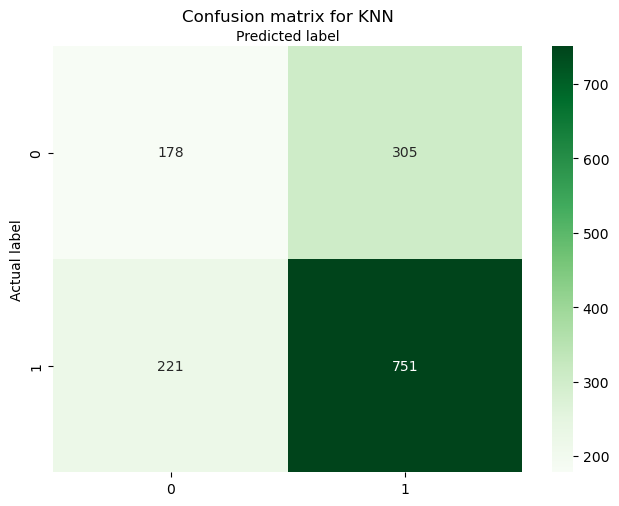

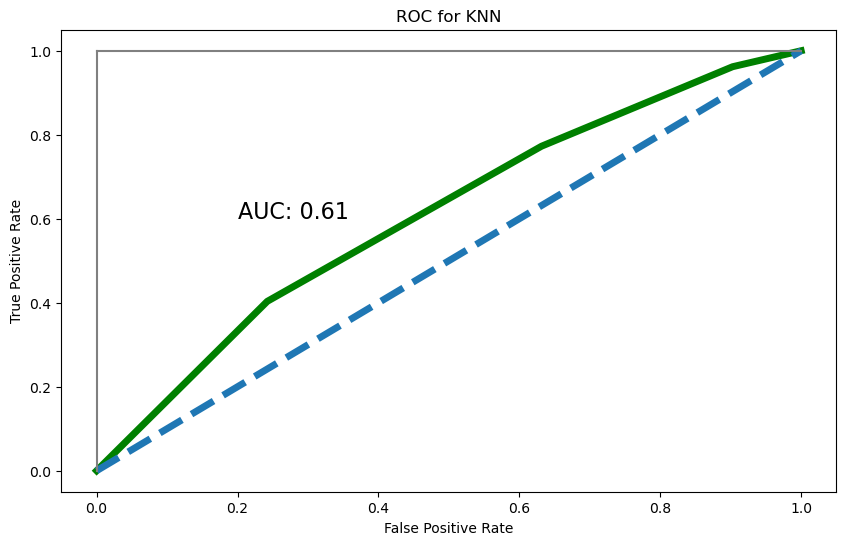

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

# Initialize the KNN model with k=3 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = knn_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for KNN')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_knn = round(accuracy_score(y_pred,y_test)*100,2)

### Naive Bayes

Accuracy: 0.6735395189003437
              precision    recall  f1-score   support

           0       0.61      0.05      0.08       483
           1       0.68      0.99      0.80       972

    accuracy                           0.67      1455
   macro avg       0.64      0.52      0.44      1455
weighted avg       0.65      0.67      0.56      1455



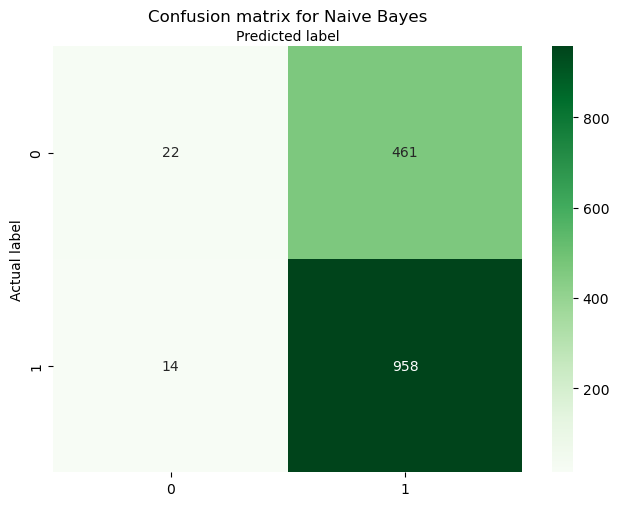

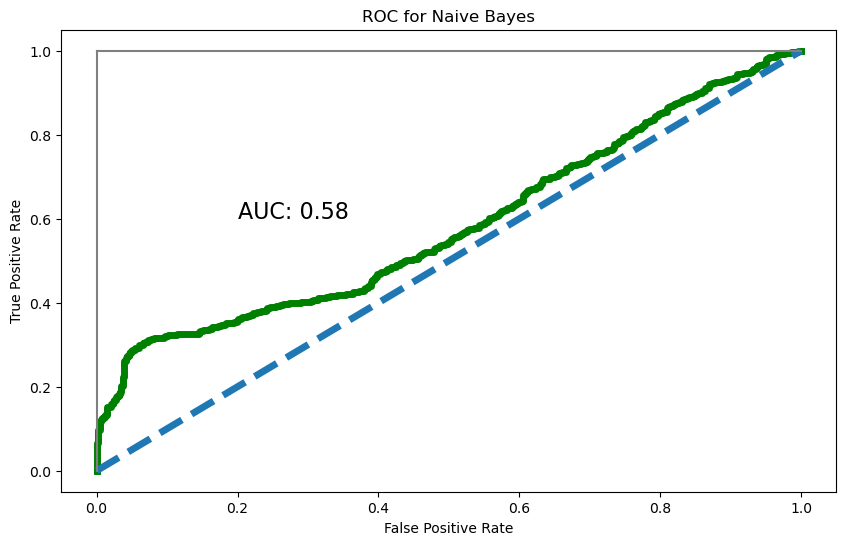

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = nb_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_nb = round(accuracy_score(y_pred,y_test)*100,2)

### AdaBoost

Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       104
           1       0.81      0.92      0.86        96

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



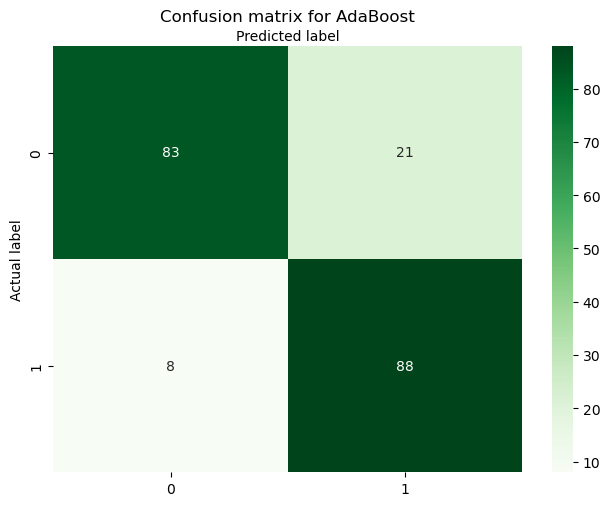

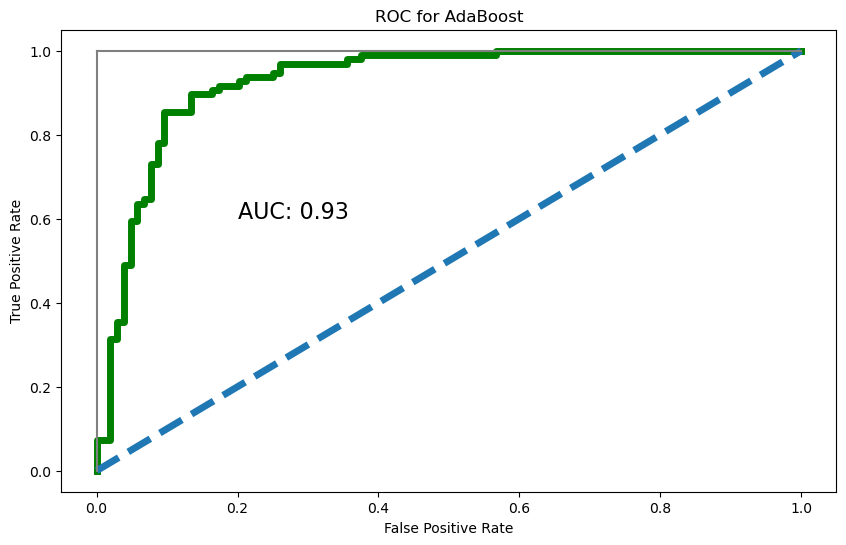

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree as the weak learner
base_model = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for AdaBoost')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = adaboost_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for AdaBoost')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_AdaBoost = round(accuracy_score(y_pred,y_test)*100,2)

### SVM

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       104
           1       0.94      0.98      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



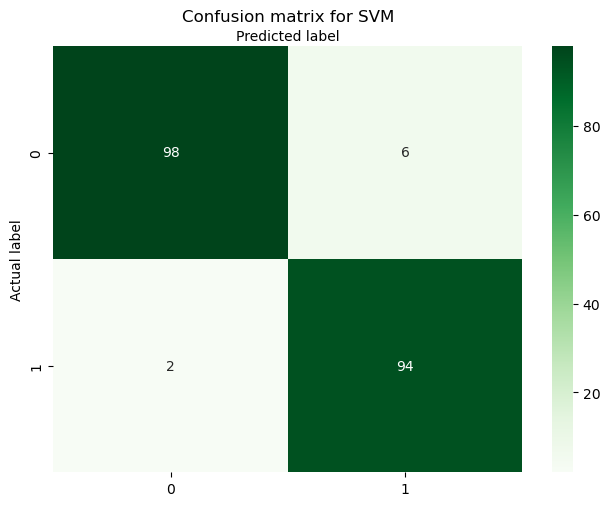

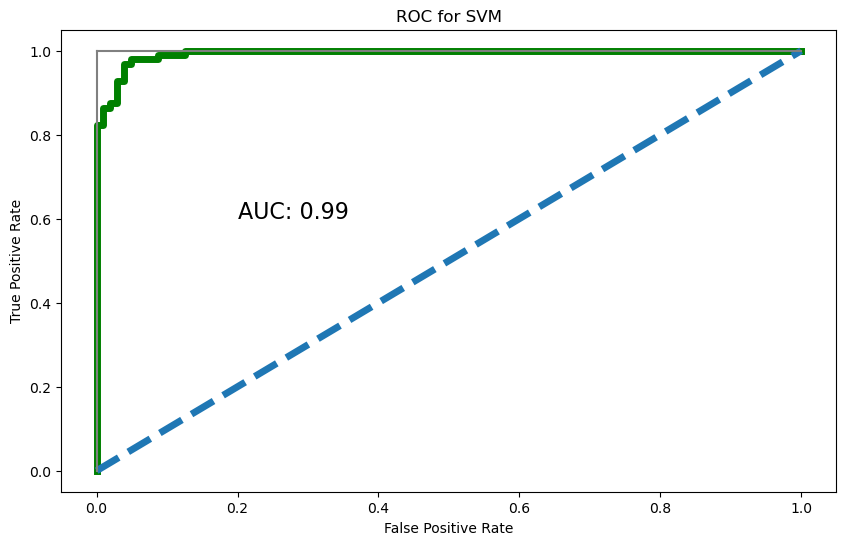

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = svm_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for SVM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_svm = round(accuracy_score(y_pred,y_test)*100,2)

### XGBoost

In [35]:
pip install xgboost

Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       104
           1       0.94      0.98      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



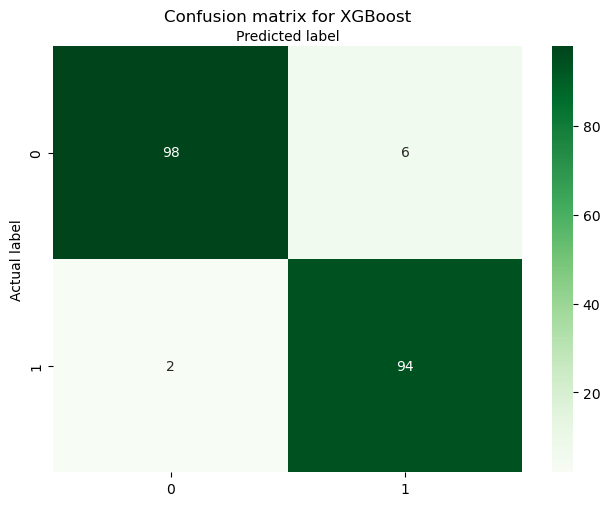

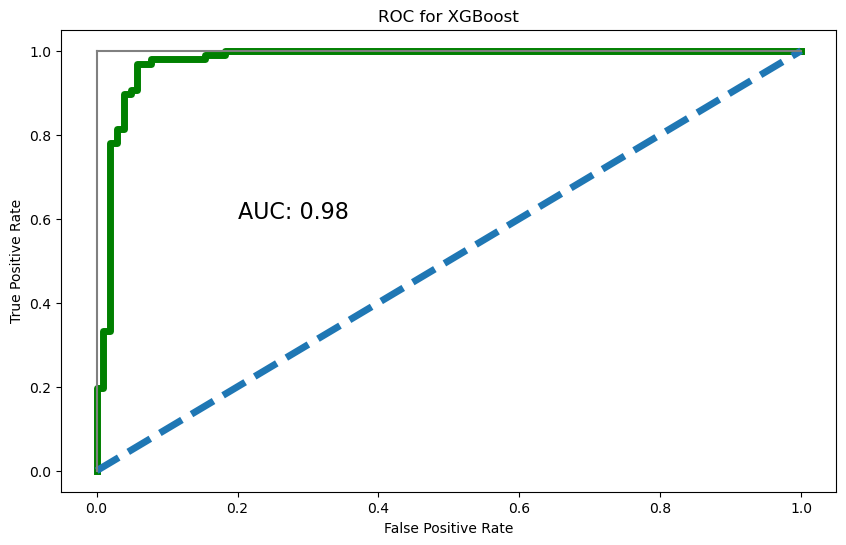

In [36]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, roc_auc_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for XGBoost')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
y_probabilities = xgb_model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for XGBoost')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
score_XGBoost = round(accuracy_score(y_pred,y_test)*100,2)

### Comparison of Models

The accuracy score achieved using RandomForest is: 70.72 %
The accuracy score achieved using Decision Tree is: 65.57 %
The accuracy score achieved using KNN is: 63.85 %
The accuracy score achieved using Naive Bayes is: 67.35 %
The accuracy score achieved using AdaBoost is: 85.5 %
The accuracy score achieved using SVM is: 96.0 %
The accuracy score achieved using XGBoost is: 96.0 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

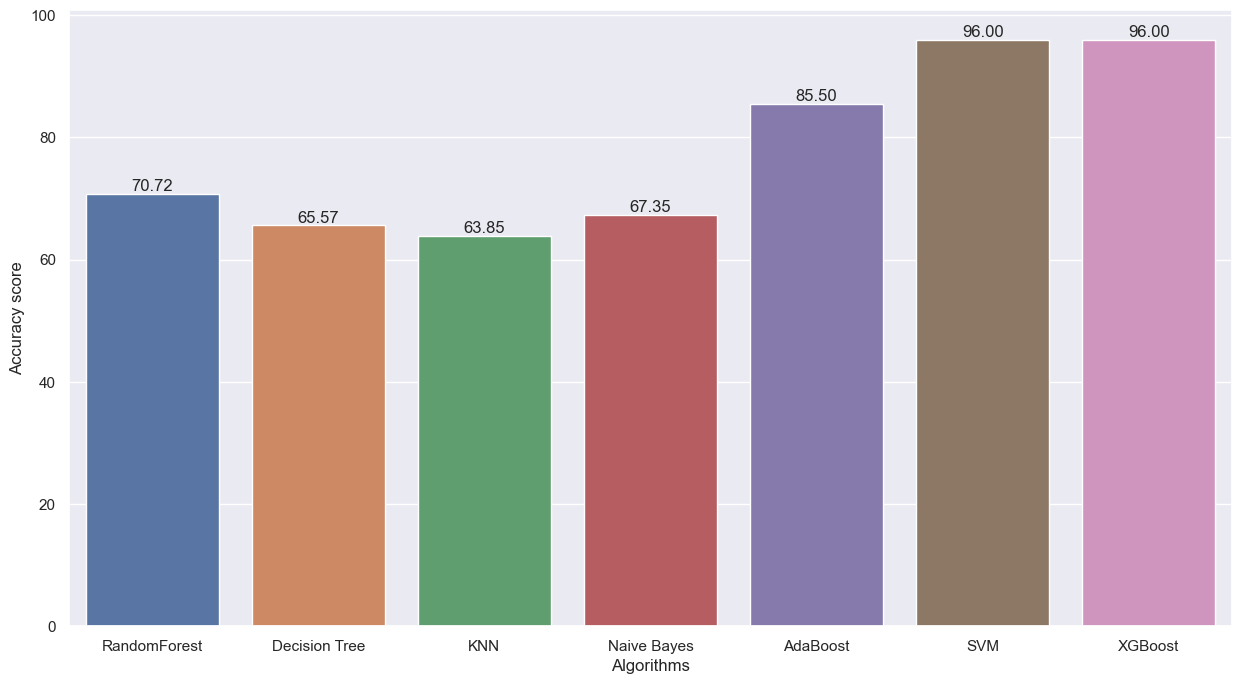

In [38]:

# List of machine learning model names
models = ['RandomForest','Decision Tree', 'KNN','Naive Bayes', 'AdaBoost','SVM','XGBoost']
scores = [score_rf,score_dt,score_knn,score_nb,score_AdaBoost,score_svm,score_XGBoost]

for i in range(len(scores)):
    print("The accuracy score achieved using "+models[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
for i, v in enumerate(scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
sns.barplot(x=models ,y=scores)

#### --> The data is preprocessed by removing unnecessary features and rows with null values which doesn't significantly affect the analysis the analysis 

#### -->Exploratory Data Analyis(EDA) is done to identify how each feature affects the result and how the features are related to each other

#### --> The data is trained with different model and their accuracy and AUC curves are obtained.

#### --> Highest accuracy of 96% is obtained using SVM and xgboost whcih can be used for prediction purpose